### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajid Majeed
### Module: Deep Learning
### Course: Data Science With Artificial Intelligence
### Program: One Year Post Graduate Diploma (PGD)
### University: NED Academy
### Email: ambreen.upwork.27@gmail.com
### GitHub: https://github.com/ambreenraheem

### Using the same workflow as Assignment 1, now tackle a more complex dataset — , which contains small 32x32 color images across 100 different categories.

## 1. Load the CIFAR-100 Dataset

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 2. Visualize Sample Images and Labels

In [7]:
fine_labels = cifar100.load_data(label_mode='fine')[1][1]
# Full list available from documentation or load programmatically
label_names = ['apple', 'iaquarum_fish', 'baby', ...]

CIFAR-100 images are only 32x32 pixels, which is very small. Is wajah se unki clarity naturally kam hoti hai.

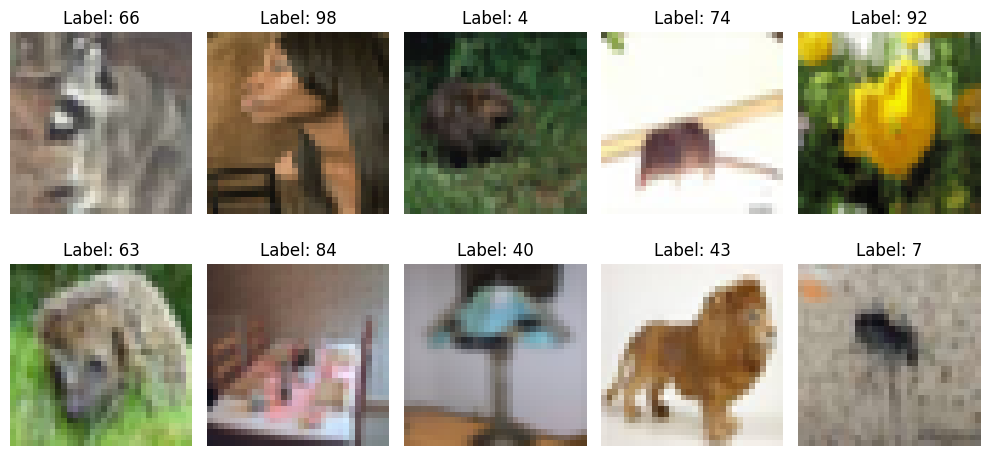

In [8]:
# Visualize 10 random images
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Normalize the Images

In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## 4. One-Hot Encode the Labels


In [15]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

## 5. Build a Deeper CNN for CIFAR-100


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,706,084 (10.32 MB)

 Trainable params: 2,705,188 (10.32 MB)

 Non-trainable params: 896 (3.50 KB)

## 6. Train the Model and Monitor Performance

In [20]:
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 863s 685ms/step - accuracy: 0.0254 - loss: 4.4789 - val_accuracy: 0.0442 - val_loss: 4.2599
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 859s 683ms/step - accuracy: 0.0325 - loss: 4.3862 - val_accuracy: 0.0487 - val_loss: 4.2129
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 859s 687ms/step - accuracy: 0.0351 - loss: 4.3173 - val_accuracy: 0.0600 - val_loss: 4.1477
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 825s 660ms/step - accuracy: 0.0429 - loss: 4.2745 - val_accuracy: 0.0721 - val_loss: 4.1201
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 897s 687ms/step - accuracy: 0.0483 - loss: 4.2251 - val_accuracy: 0.0822 - val_loss: 3.9483
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 855s 684ms/step - accuracy: 0.0578 - loss: 4.1438 - val_accuracy: 0.0983 - val_loss: 3.9272
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 862s 684ms/step - accuracy: 0.0665 - loss: 4.0803 - val_accuracy: 0.1076 - val_loss: 3.8108
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 862s 684ms/step - ac

## 7. Plot Learning Curves

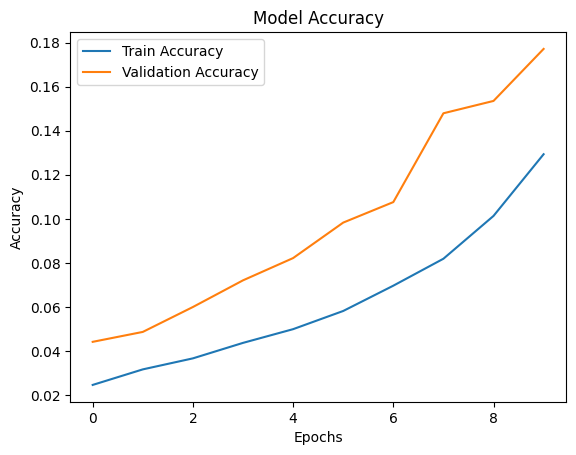

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 8. Evaluate Test Accuracy and Show Confusion Matrix

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.1819 - loss: 3.4245
Test Accuracy: 0.18


In [23]:
# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step


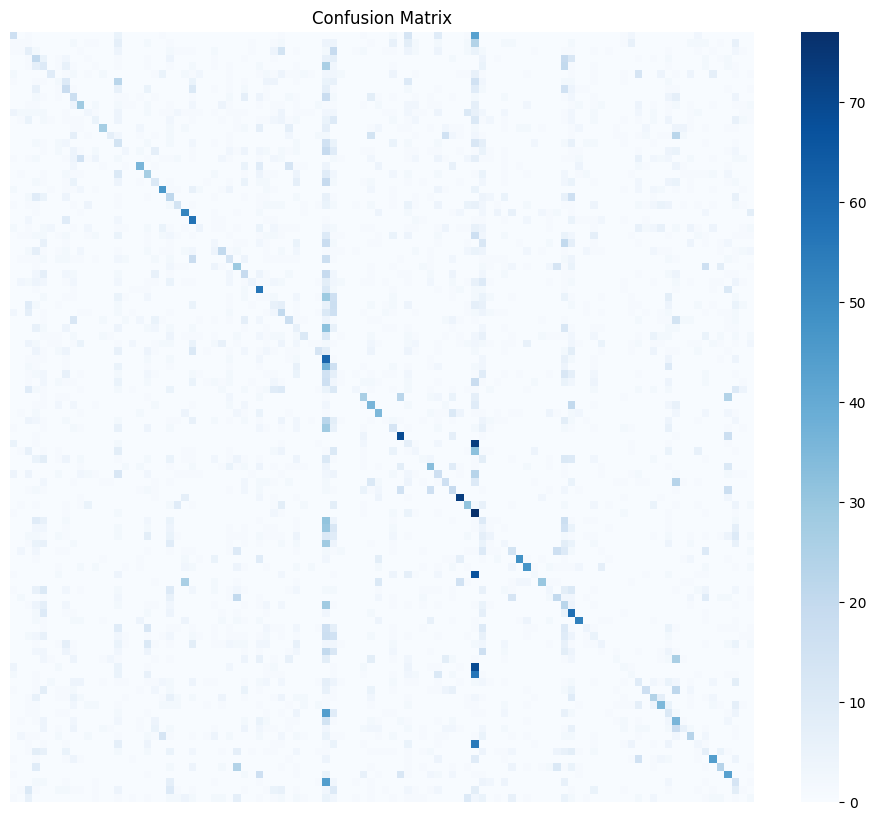

In [24]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, xticklabels=False, yticklabels=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import cv2

In [28]:
test_img = cv2.imread('/content/fish.jpg')

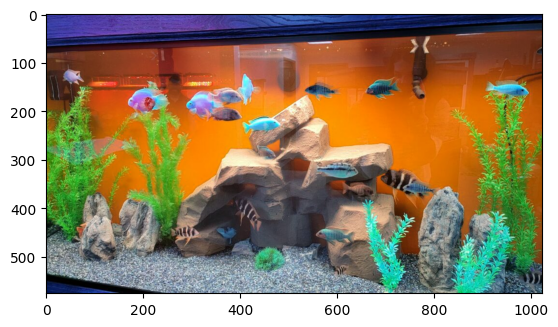

In [29]:
plt.imshow(test_img)

## 9. Report Class-Wise Accuracy

In [30]:
report = classification_report(y_true, y_pred, output_dict=True)
for label in range(100):
    print(f"Class {label} accuracy: {report[str(label)]['precision']:.2f}")

Class 0 accuracy: 0.28
Class 1 accuracy: 0.04
Class 2 accuracy: 0.06
Class 3 accuracy: 0.10
Class 4 accuracy: 0.06
Class 5 accuracy: 0.47
Class 6 accuracy: 0.04
Class 7 accuracy: 0.13
Class 8 accuracy: 0.14
Class 9 accuracy: 0.32
Class 10 accuracy: 0.11
Class 11 accuracy: 0.17
Class 12 accuracy: 0.66
Class 13 accuracy: 0.54
Class 14 accuracy: 0.06
Class 15 accuracy: 0.16
Class 16 accuracy: 0.00
Class 17 accuracy: 0.58
Class 18 accuracy: 0.19
Class 19 accuracy: 0.17
Class 20 accuracy: 0.54
Class 21 accuracy: 0.11
Class 22 accuracy: 0.33
Class 23 accuracy: 0.44
Class 24 accuracy: 0.29
Class 25 accuracy: 0.25
Class 26 accuracy: 0.00
Class 27 accuracy: 0.05
Class 28 accuracy: 0.36
Class 29 accuracy: 0.16
Class 30 accuracy: 0.22
Class 31 accuracy: 0.16
Class 32 accuracy: 0.40
Class 33 accuracy: 0.27
Class 34 accuracy: 0.01
Class 35 accuracy: 0.07
Class 36 accuracy: 0.14
Class 37 accuracy: 0.25
Class 38 accuracy: 0.05
Class 39 accuracy: 0.41
Class 40 accuracy: 0.17
Class 41 accuracy: 0.43
Cl

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
